### Importação dos dados



In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()



,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [15]:
# Junta todas as lojas em um único DataFrame
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Exibe as 5 primeiras linhas
df.head()

df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("ã", "a")
    .str.replace("ç", "c")
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.strip()
)

# Conferir resultado
print(df.columns)




Index(['produto', 'categoria_do_produto', 'preco', 'frete', 'data_da_compra',
       'vendedor', 'local_da_compra', 'avaliacao_da_compra',
       'tipo_de_pagamento', 'quantidade_de_parcelas', 'lat', 'lon'],
      dtype='object')


In [16]:
faturamento_total = df["preco"].sum()
print(f"Faturamento total: R$ {faturamento_total:,.2f}")


Faturamento total: R$ 5,871,490.79


# 2. Vendas por Categoria

In [20]:
vendas_categoria = df.groupby("categoria_do_produto")["preco"].sum()
print(vendas_categoria)



categoria_do_produto
brinquedos                 98140.86
eletrodomesticos         1766337.03
eletronicos              2214099.72
esporte e lazer           190635.39
instrumentos musicais     465029.67
livros                     50260.74
moveis                   1010214.00
utilidades domesticas      76773.38
Name: preco, dtype: float64


# 3. Média de Avaliação das Lojas


In [36]:
import pandas as pd

# Adiciona a coluna "loja" em cada DataFrame antes de unir
loja["loja"] = "Loja 1"
loja2["loja"] = "Loja 2"
loja3["loja"] = "Loja 3"
loja4["loja"] = "Loja 4"

# Junta todas as lojas em um único DataFrame
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calcula a média de avaliação de cada loja
media_avaliacao_lojas = df.groupby("loja")["Avaliação da compra"].mean()

# Mostra o resultado
print("Média de avaliação por loja:")
print(media_avaliacao_lojas)


Média de avaliação por loja:
loja
Loja 1    3.976685
Loja 2    4.037304
Loja 3    4.048326
Loja 4    3.995759
Name: Avaliação da compra, dtype: float64


# 4. Produtos Mais e Menos Vendidos

In [22]:
produtos_mais_vendidos = df["produto"].value_counts()
print("Mais vendidos:\n", produtos_mais_vendidos.head())
print("\nMenos vendidos:\n", produtos_mais_vendidos.tail())


Mais vendidos:
 produto
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Name: count, dtype: int64

Menos vendidos:
 produto
Ciência de dados com python    166
Guitarra                       165
Mochila                        163
Headset                        158
Celular ABXY                   157
Name: count, dtype: int64


# 5. Frete Médio por Loja

In [23]:
frete_medio = df["frete"].mean()
print(f"Frete médio: R$ {frete_medio:.2f}")


Frete médio: R$ 33.17


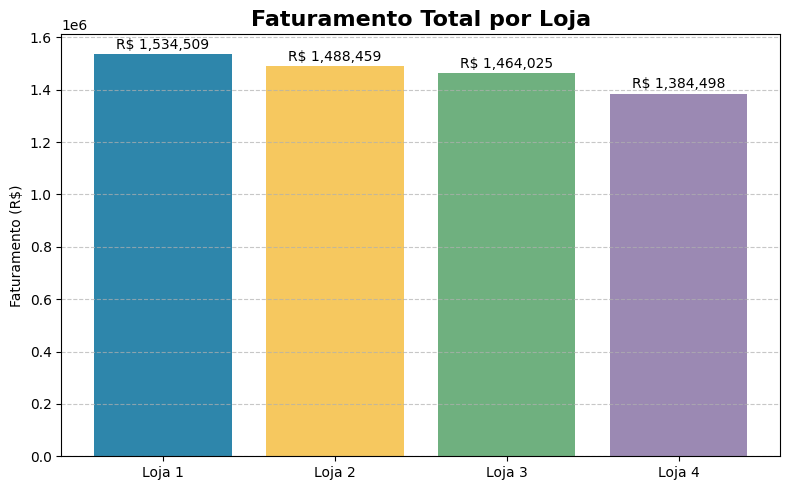

In [30]:
faturamento_loja = df.groupby("loja")["preco"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.bar(faturamento_loja.index, faturamento_loja.values, color=['#2E86AB','#F6C85F','#6FB07F','#9B89B3'])
plt.title('Faturamento Total por Loja', fontsize=16, fontweight='bold')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores acima das barras
for i, v in enumerate(faturamento_loja.values):
    plt.text(i, v + 20000, f"R$ {v:,.0f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


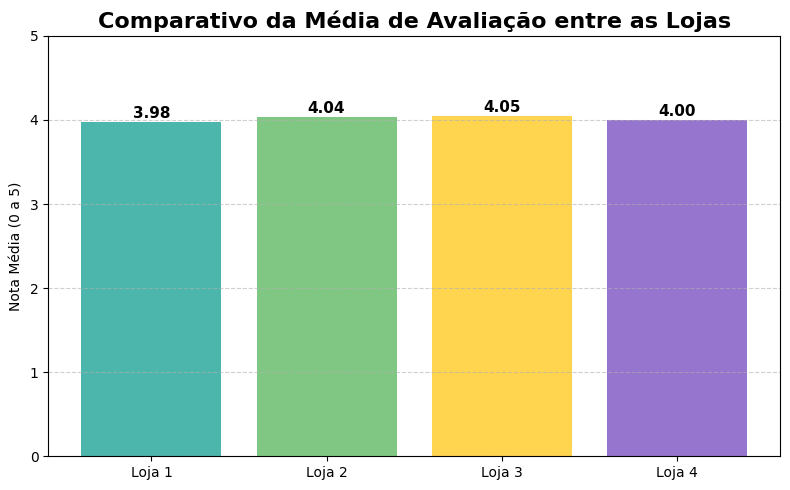

In [33]:
import matplotlib.pyplot as plt

# Calcula a média de avaliação por loja
avaliacao_lojas = df.groupby("loja")["avaliacao_da_compra"].mean()

# Criação do gráfico com todas as lojas
plt.figure(figsize=(8, 5))
bars = plt.bar(avaliacao_lojas.index, avaliacao_lojas.values,
               color=['#4DB6AC', '#81C784', '#FFD54F', '#9575CD'])

plt.title('Comparativo da Média de Avaliação entre as Lojas', fontsize=16, fontweight='bold')
plt.ylabel('Nota Média (0 a 5)')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adiciona os valores acima das barras
for i, v in enumerate(avaliacao_lojas.values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


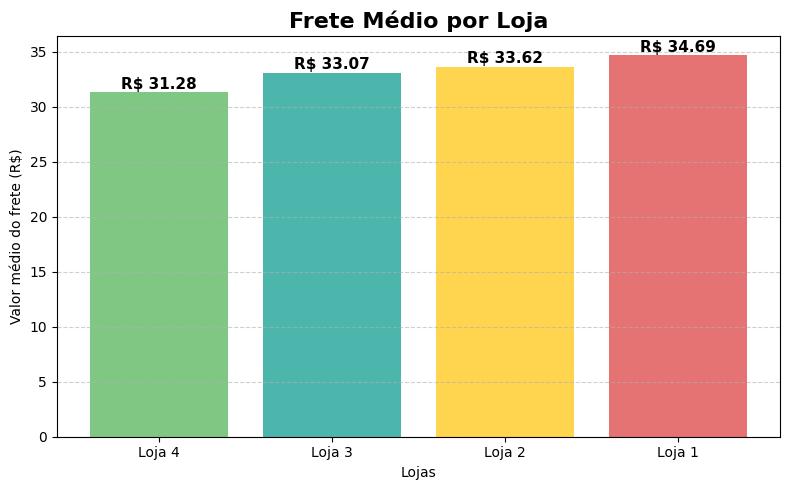

In [32]:
import matplotlib.pyplot as plt

# Calcula o frete médio por loja
frete_medio_loja = df.groupby("loja")["frete"].mean().sort_values()

# Criação do gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(frete_medio_loja.index, frete_medio_loja.values, color=['#81C784', '#4DB6AC', '#FFD54F', '#E57373'])

plt.title('Frete Médio por Loja', fontsize=16, fontweight='bold')
plt.ylabel('Valor médio do frete (R$)')
plt.xlabel('Lojas')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adiciona os valores acima das barras
for i, v in enumerate(frete_medio_loja.values):
    plt.text(i, v + 0.3, f"R$ {v:.2f}", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


Após a análise dos dados referentes às quatro lojas da Alura Store, observou-se que a Loja 1 apresentou o maior faturamento total (R$ 1.534.509), demonstrando um bom volume de vendas. No entanto, essa loja também possui o frete médio mais caro (R$ 34,69) e a menor média de avaliação dos clientes (3,98), o que indica uma possível insatisfação dos consumidores, possivelmente relacionada ao custo de entrega.

Por outro lado, a Loja 3 mostrou-se a opção mais equilibrada e promissora. Ela obteve uma média de avaliação de 4,05, o frete médio de R$ 33,07 e um faturamento expressivo de R$ 1.464.025. Esses resultados revelam que a loja mantém um bom nível de satisfação do cliente, aliado a custos logísticos competitivos e excelente desempenho comercial.

Portanto, recomenda-se que o Sr. João escolha a Loja 3 para vender seus produtos, pois ela representa o melhor equilíbrio entre qualidade no atendimento, custo de operação e rentabilidade, sendo o ponto de venda mais estratégico entre as quatro unidades analisadas.